In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import linear_model

## Representation of the dataset

In [2]:
prices_df=pd.read_csv('carprices.csv')
prices_df

,Car Model,Mileage,Sell Price($),Age(yrs)
0,BMW X5,69000,18000,6
1,BMW X5,35000,34000,3
2,BMW X5,57000,26100,5
3,BMW X5,22500,40000,2
4,BMW X5,46000,31500,4
5,Audi A5,59000,29400,5
6,Audi A5,52000,32000,5
7,Audi A5,72000,19300,6
8,Audi A5,91000,12000,8
9,Mercedez Benz C class,67000,22000,6


## Data cleaning
 *Renaming the columns name to ease the computation

In [51]:
prices_df.rename(columns={'Car Model': 'CarModel'},inplace=True)
prices_df.rename(columns={'Sell Price($)': 'SellPrice'},inplace=True)
prices_df.rename(columns={'Age(yrs)': 'Age'},inplace=True)
prices_df

,CarModel,Mileage,SellPrice,Age
0,BMW X5,69000,18000,6
1,BMW X5,35000,34000,3
2,BMW X5,57000,26100,5
3,BMW X5,22500,40000,2
4,BMW X5,46000,31500,4
5,Audi A5,59000,29400,5
6,Audi A5,52000,32000,5
7,Audi A5,72000,19300,6
8,Audi A5,91000,12000,8
9,Mercedez Benz C class,67000,22000,6


## Encoding the categorical variables i.e the model name of the different car to numerical digits.

In [52]:
dummies=pd.get_dummies(prices_df.CarModel)
dummies

,Audi A5,BMW X5,Mercedez Benz C class
0,0,1,0
1,0,1,0
2,0,1,0
3,0,1,0
4,0,1,0
5,1,0,0
6,1,0,0
7,1,0,0
8,1,0,0
9,0,0,1


## Visualizing the mileage of the car vs sell rice for different category of car

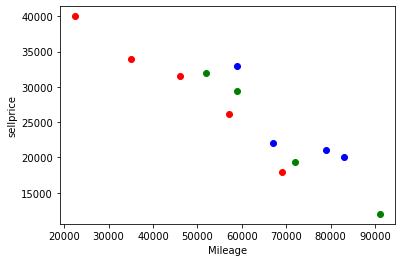

In [53]:
BMWX5_prices = prices_df[prices_df['CarModel'] == 'BMW X5']
AudiA5_prices = prices_df[prices_df['CarModel'] == 'Audi A5']
Mercedez_Benz_C_class_prices = prices_df[prices_df['CarModel'] == 'Mercedez Benz C class']

plt.scatter(BMWX5_prices.Mileage, BMWX5_prices.SellPrice,color = 'red')
plt.scatter(AudiA5_prices.Mileage, AudiA5_prices.SellPrice,color = 'green')
plt.scatter(Mercedez_Benz_C_class_prices.Mileage, Mercedez_Benz_C_class_prices.SellPrice,color = 'blue')
plt.xlabel('Mileage')
plt.ylabel('sellprice');



## Visualizing the price of the car vs mileage for different category of car

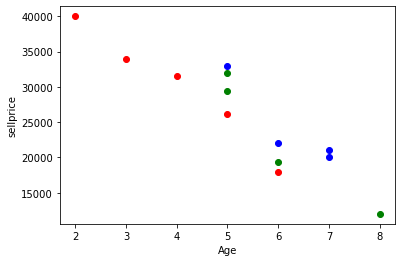

In [56]:

plt.scatter(BMWX5_prices.Age, BMWX5_prices.SellPrice,color = 'red')
plt.scatter(AudiA5_prices.Age, AudiA5_prices.SellPrice,color = 'green')
plt.scatter(Mercedez_Benz_C_class_prices.Age, Mercedez_Benz_C_class_prices.SellPrice,color = 'blue')

plt.xlabel('Age')
plt.ylabel('sellprice');

## conactenating the columns with the dataset

In [15]:
df_dummies=pd.concat([prices_df,dummies],axis='columns')
df_dummies

,CarModel,Mileage,SellPrice,Age(yrs),Audi A5,BMW X5,Mercedez Benz C class
0,BMW X5,69000,18000,6,0,1,0
1,BMW X5,35000,34000,3,0,1,0
2,BMW X5,57000,26100,5,0,1,0
3,BMW X5,22500,40000,2,0,1,0
4,BMW X5,46000,31500,4,0,1,0
5,Audi A5,59000,29400,5,1,0,0
6,Audi A5,52000,32000,5,1,0,0
7,Audi A5,72000,19300,6,1,0,0
8,Audi A5,91000,12000,8,1,0,0
9,Mercedez Benz C class,67000,22000,6,0,0,1


## Assigning the features of the training examples to the variable X.

In [23]:
X=df_dummies.drop(['CarModel','SellPrice','Mercedez Benz C class'],axis='columns').values
X

array([[69000,     6,     0,     1],
       [35000,     3,     0,     1],
       [57000,     5,     0,     1],
       [22500,     2,     0,     1],
       [46000,     4,     0,     1],
       [59000,     5,     1,     0],
       [52000,     5,     1,     0],
       [72000,     6,     1,     0],
       [91000,     8,     1,     0],
       [67000,     6,     0,     0],
       [83000,     7,     0,     0],
       [79000,     7,     0,     0],
       [59000,     5,     0,     0]], dtype=int64)

## Assigning the output column of the training examples to the variable y.

In [22]:
y=df_dummies.SellPrice.values
y

array([18000, 34000, 26100, 40000, 31500, 29400, 32000, 19300, 12000,
       22000, 20000, 21000, 33000], dtype=int64)

## fitting the linear regression model.

In [25]:
model=linear_model.LinearRegression()
model.fit(X,y)


LinearRegression()

## price of a year year old Mercedez Benz C class car with 45000 mileage

In [26]:
model.predict([[45000,4,0,0]])

array([36991.31721061])

## finding the coefficients and the intercepts of the model

In [27]:
model.coef_

array([-3.70122094e-01, -1.33245363e+03, -2.45354074e+03, -6.73820733e+03])

In [28]:
model.intercept_

58976.62596853723

## price of a 7 year old BMW X5 car with 86000 mileage

In [29]:
model.predict([[86000,7,0,1]])

array([11080.74313219])

## score of the predicted model

In [31]:
model.score(X,y)

0.9417050937281082

## saving the model for future predictions

In [39]:
import pickle

In [45]:
with open('model_pickle','wb')as file:
    pickle.dump(model,file)

In [46]:
with open('model_pickle','rb')as f:
    mb=pickle.load(f)
    mb.coef_

In [47]:
model.coef_

array([-3.70122094e-01, -1.33245363e+03, -2.45354074e+03, -6.73820733e+03])